Dataset yang digunakan [Ecommerce Customer Churn Analysis and Prediction](https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction)

# Stage 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 2
rcParams['xtick.labelsize'] = 'large'
rcParams['ytick.labelsize'] = 'large'

In [ ]:
# google drive auth
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

sns.set_style('darkgrid')
sns.set(font_scale=1.3)

In [ ]:
sns.set(rc={'figure.figsize': (20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
# Read Dataset
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/e com.xlsx')
df.sample(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
543,50544,0,1.0,Phone,1,NaN,CC,Female,3.0,3,Mobile,3,Married,6,0,18.0,2.0,2.0,2.0,123.77
4475,54476,0,17.0,Computer,1,17.0,Debit Card,Female,3.0,4,Mobile Phone,1,Single,2,0,20.0,1.0,2.0,8.0,149.55
1307,51308,0,10.0,Mobile Phone,1,16.0,Debit Card,Female,2.0,1,Fashion,1,Married,2,1,25.0,0.0,NaN,8.0,237.44
3120,53121,0,9.0,Mobile Phone,1,29.0,Debit Card,Male,3.0,6,Mobile Phone,3,Single,2,0,16.0,3.0,5.0,4.0,167.30
4737,54738,0,11.0,Mobile Phone,1,17.0,Debit Card,Female,3.0,4,Mobile Phone,5,Married,2,1,14.0,5.0,5.0,4.0,152.82


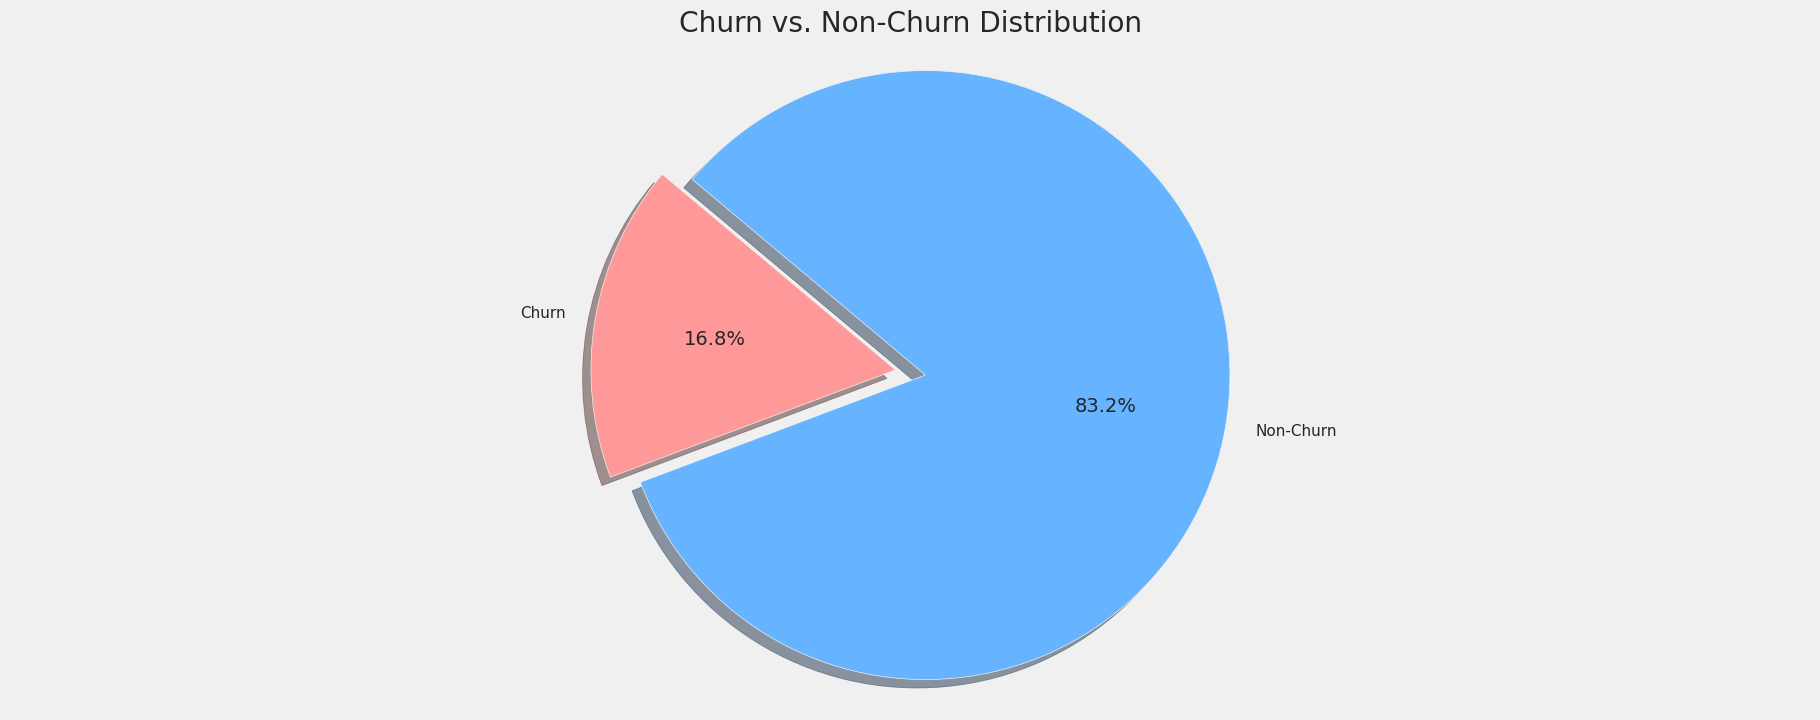

In [ ]:
import matplotlib.pyplot as plt

# Calculate the count of churn and non-churn
churn_count = df['Churn'].sum()
non_churn_count = len(df) - churn_count

# Create a pie chart
labels = ['Churn', 'Non-Churn']
sizes = [churn_count, non_churn_count]
colors = ['#ff9999', '#66b3ff']  # Red for churn, Blue for non-churn
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.title('Churn vs. Non-Churn Distribution')
plt.show()

Tingkat Churn sebanyak 16,8%

## Descriptive Statistik

In [ ]:
df.columns.values

array(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice',
       'CityTier', 'WarehouseToHome', 'PreferredPaymentMode', 'Gender',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'PreferedOrderCat',
       'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed',
       'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'], dtype=object)

In [ ]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

1. Terdapat missing value di beberapa kolom seperti Tenure, WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder
2. Tipe data sudah sesuai

---



---



In [ ]:
# Pisahkan Categorical & Numerical

cats = []
nums = []

for i in df.columns:
  if df[i].dtype == 'object':
    cats.append(i)
  else:
    nums.append(i)

print('Categorical =', cats)
print('Numerical =', nums)

Categorical = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
Numerical = ['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


In [ ]:
cats = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
nums = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'NumberOfAddress',
        'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount', 'CityTier', 'SatisfactionScore','Complain']

#memisahkan data tipe Kontinu(Interval)
kontinu_interval  = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'NumberOfAddress',
                     'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

#memisahkan data tipe Kategorikal(Ordinal dan Nominal)
kategorikal_ordinal = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
kategorikal_nominal = ['Churn', 'CityTier', 'SatisfactionScore','Complain']

In [ ]:
#Statistika Summary Numerikal
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


Dari summary numericals, tidak terlihat ada data yang aneh. Namun ada beberapa kolom yang skew.

In [ ]:
#Statistika Summary Kategorikal
df[cats].describe()

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


In [ ]:
# See unique values from PreferredLoginDevice
df['PreferredLoginDevice'].unique()

array(['Mobile Phone', 'Phone', 'Computer'], dtype=object)

Pada variabel PreferredLoginDevice terdapat value yang ambigu antara Mobile Phone dengan Phone. Perlu dilakukan Perlu dilakukan drop variable yang ada pada proses Pre-prosessing

In [ ]:
# See unique values from PreferredPaymentMode
df['PreferredPaymentMode'].unique()

array(['Debit Card', 'UPI', 'CC', 'Cash on Delivery', 'E wallet', 'COD',
       'Credit Card'], dtype=object)

Pada variabel PreferredPaymentMode terdapat value yang ambigu antara CC dengan Credit Card, dan Cash On Delivery dengan COD. Perlu dilakukan Perlu dilakukan drop variable yang ada pada proses Pre-prosessing

In [ ]:
# See unique values from Gender
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
# See unique values from PreferedOrderCat
df['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile', 'Mobile Phone', 'Others',
       'Fashion', 'Grocery'], dtype=object)

Pada variabel PreferredOrderCat terdapat value yang ambigu antara Mobile Phone dengan Phone. Perlu dilakukan Perlu dilakukan drop variable yang ada pada proses Pre-prosessing

In [ ]:
# See unique values from MaritalStatus
df['MaritalStatus'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

>> Melihat Ketimpangan Data di Categoricals (Value Counting)

In [ ]:
for col in cats:
  print(f'''Value count kolom{col}:''')
  print(df[col].value_counts())
  print()

Value count kolomPreferredLoginDevice:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

Value count kolomPreferredPaymentMode:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

Value count kolomGender:
Male      3384
Female    2246
Name: Gender, dtype: int64

Value count kolomPreferedOrderCat:
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

Value count kolomMaritalStatus:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64



## Univariate Analysis

### Individual Boxplot (kontinu_interval)

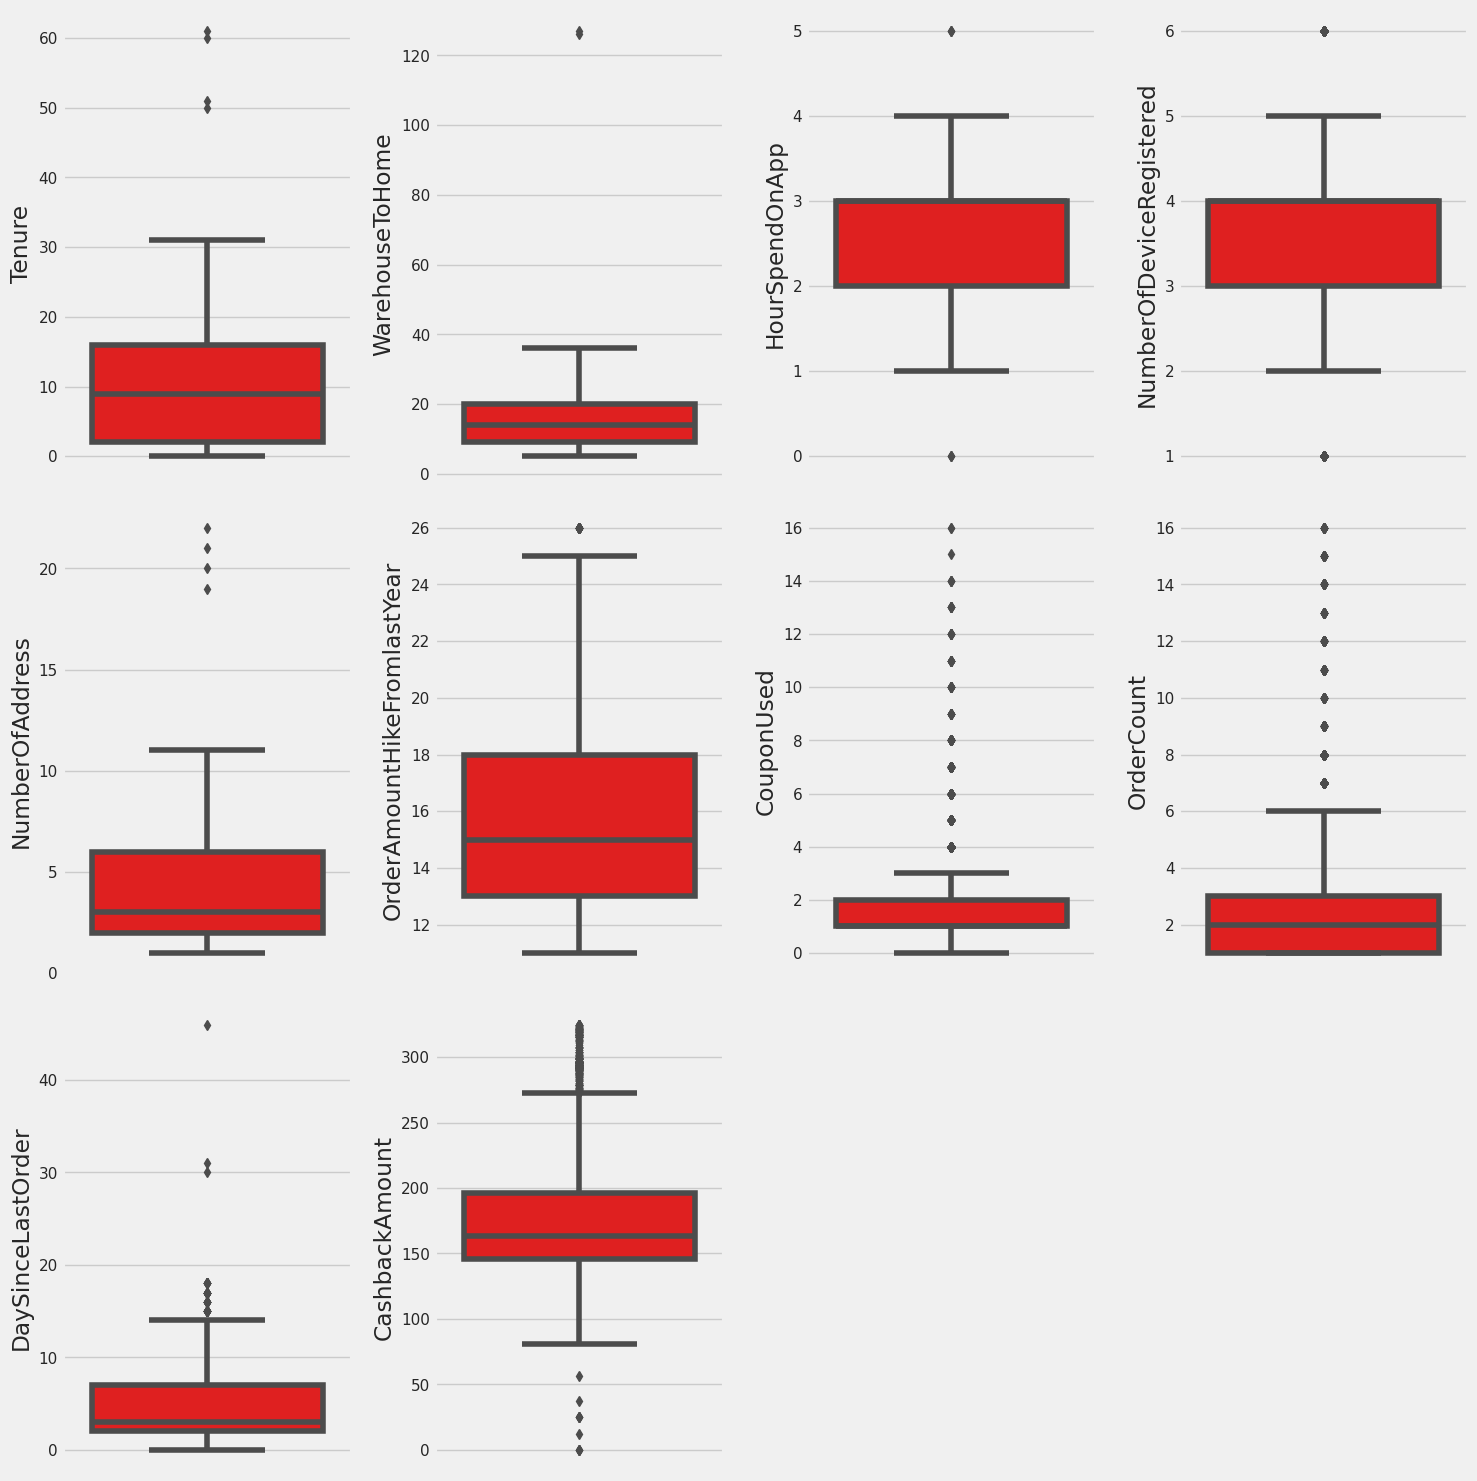

In [ ]:
features = kontinu_interval
plt.figure(figsize=(15,20))
for i in range(0, len(features)):
  plt.subplot(4, 4, i+1)
  sns.boxplot(y=df[features[i]], color='red', orient='v')
  plt.tight_layout()

1. Dari visualisasi boxplot di atas terdapat outlier yang sangat jauh jaraknya yaitu ada di kolom Tenure, WarehouseToHome, NumberOfAddress, dan DaySinceLastOrder.

2. Dan diketahui ada kolom yang menjalar skewed ke kanan yaitu Tenure, WarehouseToHome, NumberOfAddress, CouponUsed, OrderCount, dan DaySinceLastOrder.

### Individual Displot (kontinu_interval)

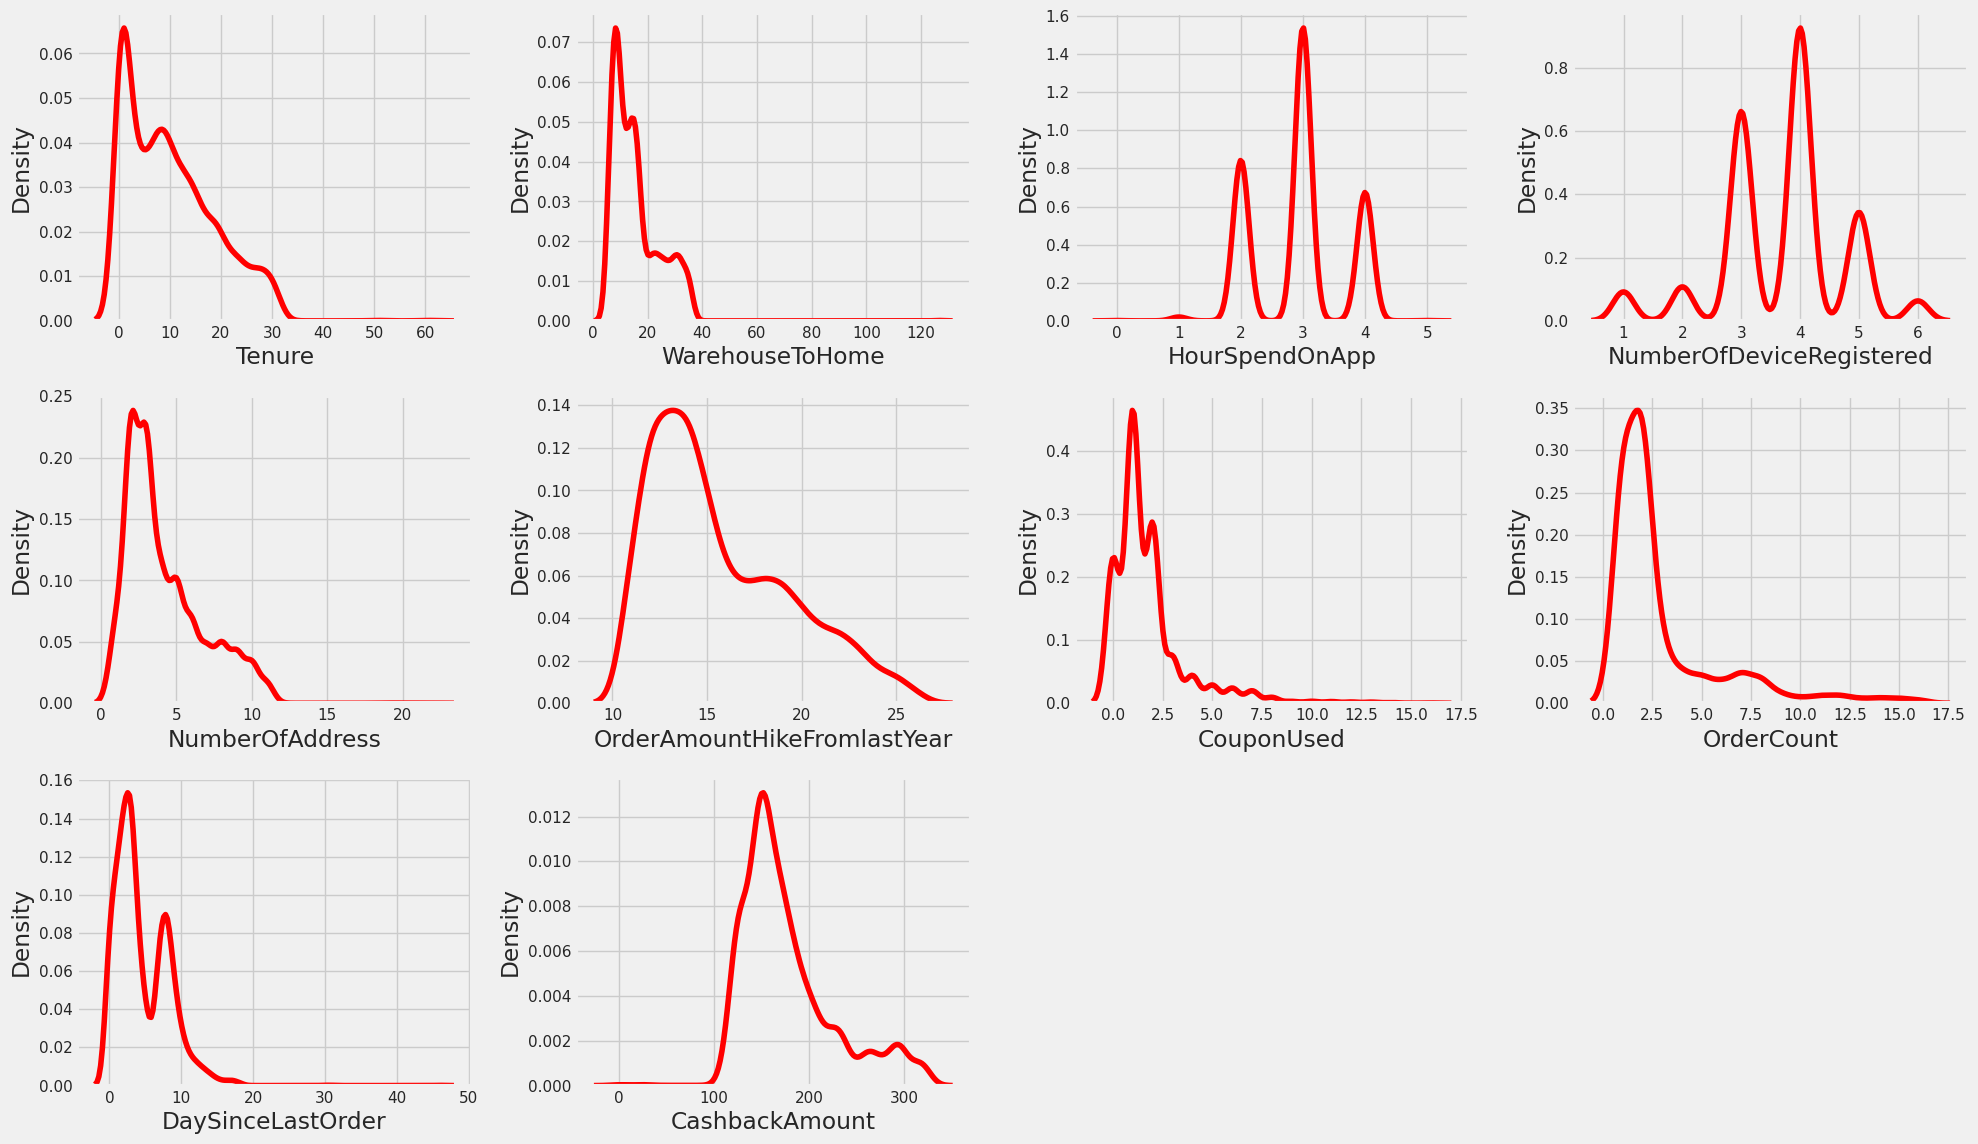

In [ ]:
features = kontinu_interval
plt.figure(figsize=(20, 15))
for i in range(0, len(features)):
  plt.subplot(4, 4, i+1)
  sns.kdeplot(x=df[features[i]], color='red')
  plt.xlabel(features[i])
  plt.tight_layout()

Dapat dilihat dari visualisasi displot di atas :

1. Kolom `Tenure`, `WarehouseToHome`, `NumberOfAddress`, `OrderAmountHikeFromlastYear`, `CouponUsed`, `OrderCount`, `DaySinceLastOrder` dan `CashbackAmount` mempunyai grafik yang skewed ke kanan (positively skew) dan pada saat nanti melakukan data preprocesing dapat melakukan feature transformation dengan menggunakan log transformation.

2. Kolom `NumberOfDeviceRegistered` menunjukan customer cenderung login lebih dari 1 device.

3. Kolom `HourSpendOnAPP` memiliki modus di 3 jam

### Individual Countplot (kategorikal_ordinal)

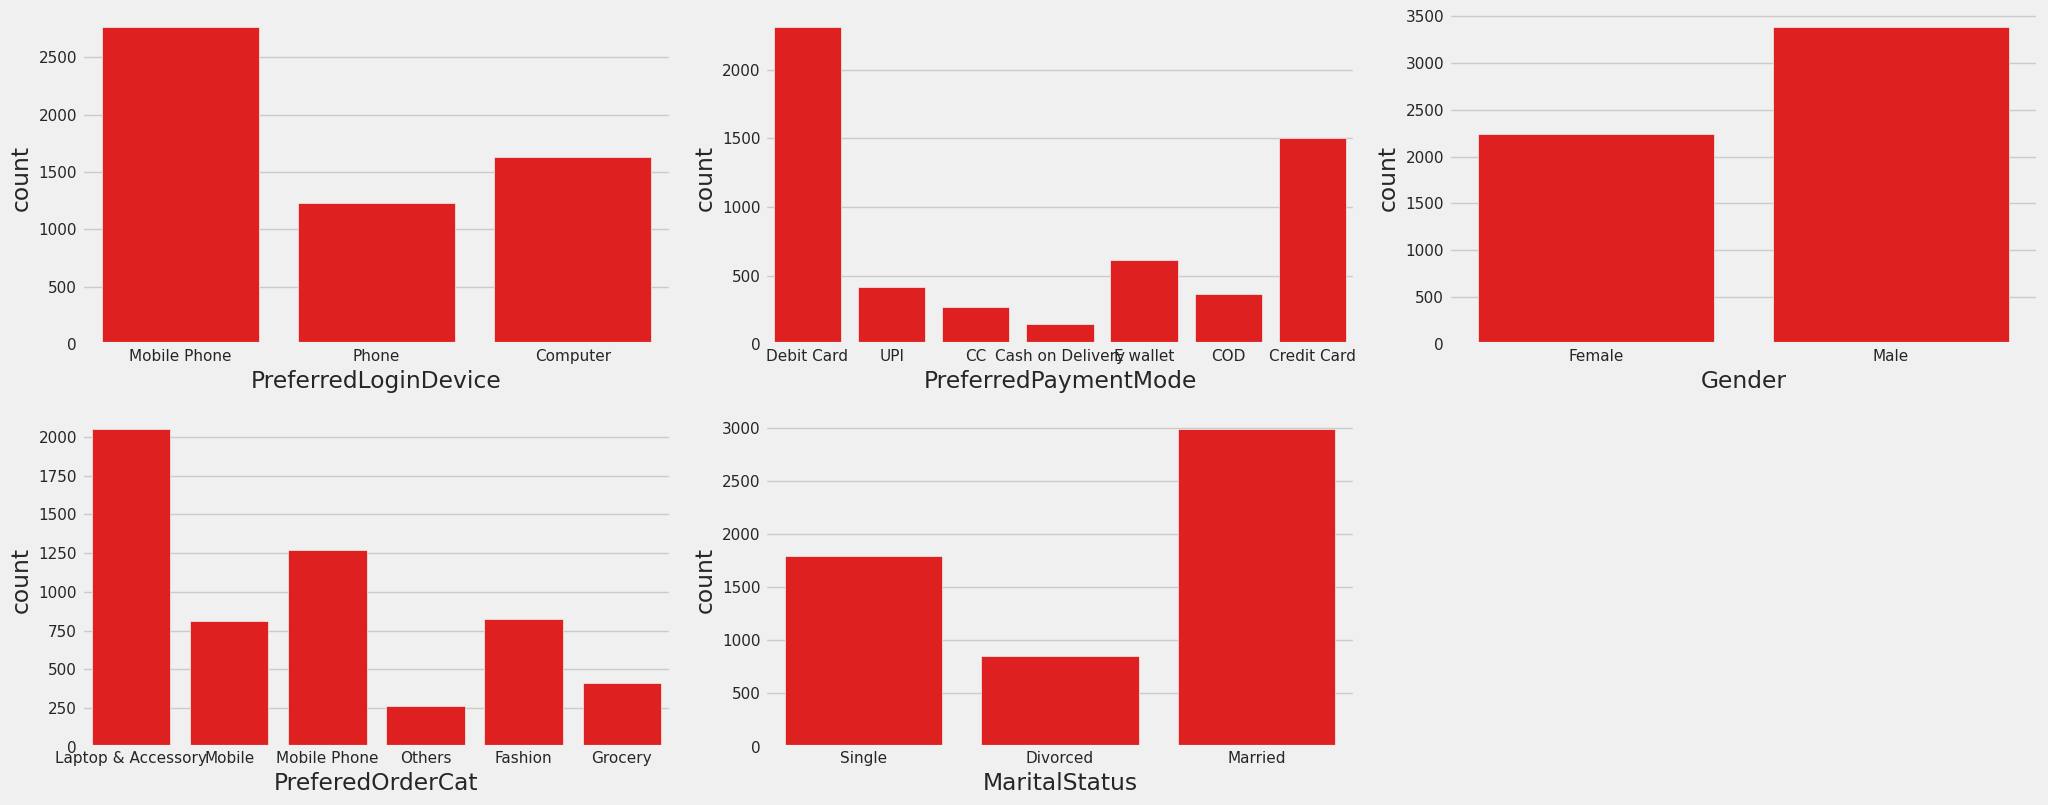

In [ ]:
features = kategorikal_ordinal
for i in range(0, len(features)):
  plt.subplot(2, 3, i+1)
  sns.countplot(x=df[features[i]], color = 'red')
  plt.tight_layout()

1. Kolom PrefferedLoginDevice mempunyai nilai yang mendominasi pada kategori Mobile Phone
2. Kolom PrefferedPaymentMode mempunyai nilai yang mendominasi pada 2 kategori yaitu Debit Card dan Credit Card
3. Kolom Gender mempunyai nilai yang mendominasi pada kategori Male
4. Kolom PreferedOrderCat mempunyai nilai yang mendominasi pada kategori Laptop & Accessory
5. Kolom MaritalStatus mempunyai nilai yang mendominast pada kategori Married

Saat nanti melakukan data preprocessing dapat melakukan feature encoding dengan menggunakan OHE (One Hot Encoding)

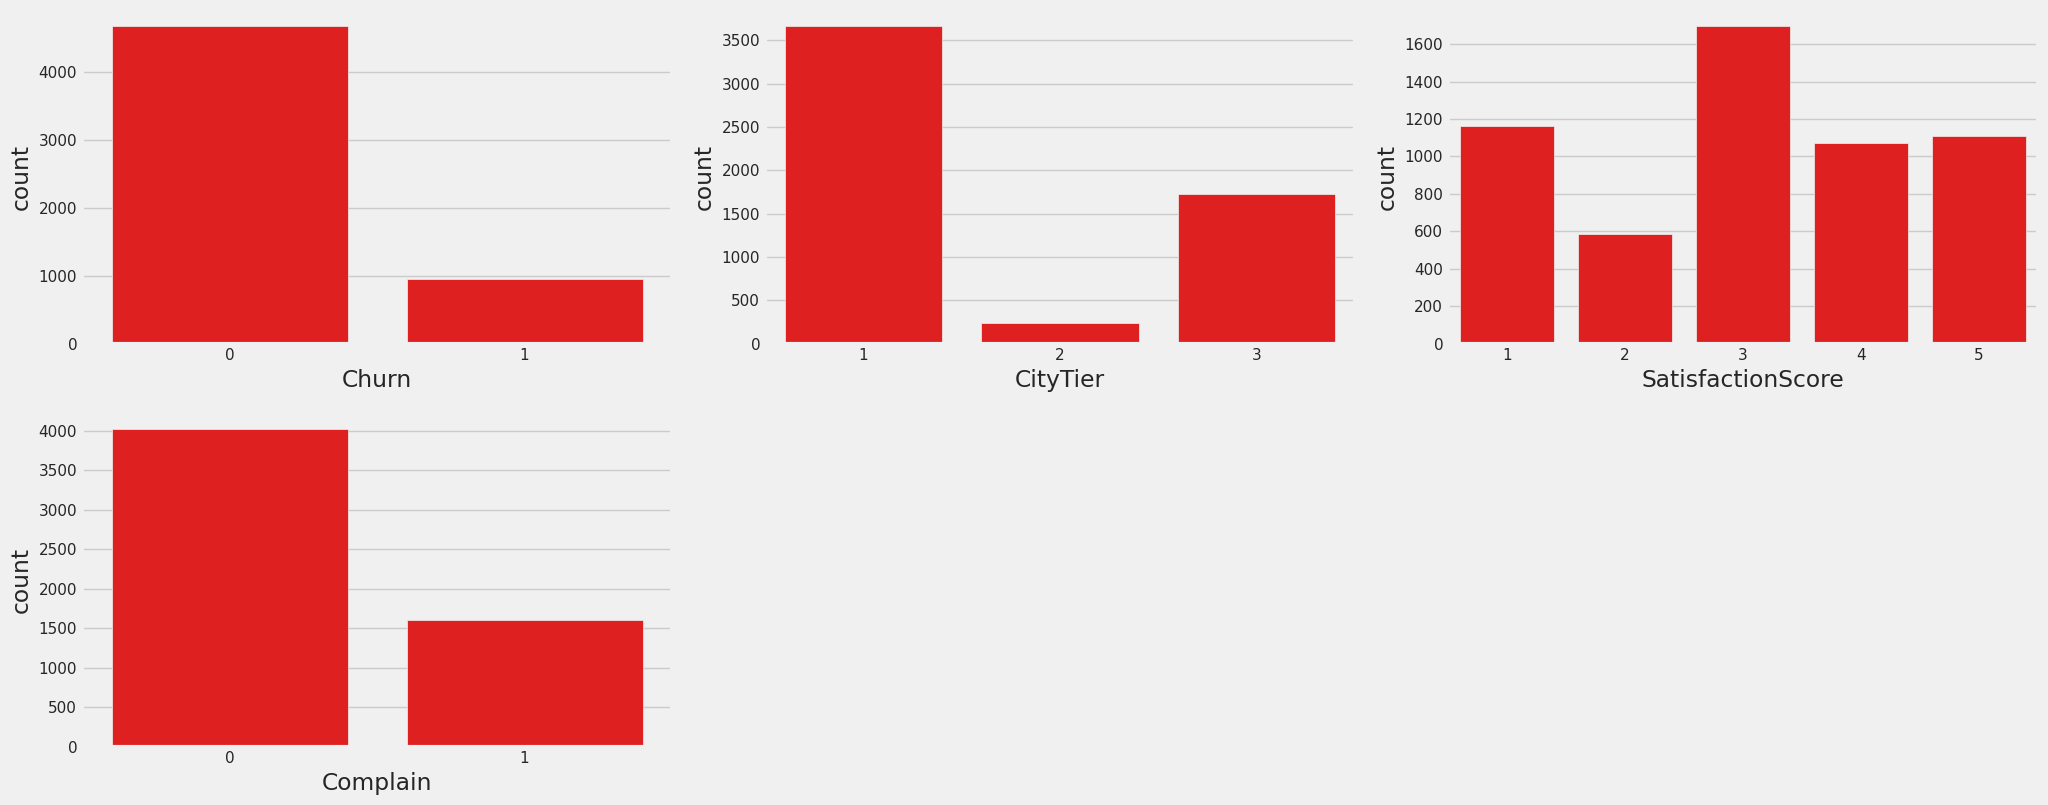

In [ ]:
features = kategorikal_nominal
for i in range(0, len(features)):
  plt.subplot(2, 3, i+1)
  sns.countplot(x=df[features[i]], color = 'red')
  plt.tight_layout()

1. Kolom `CityTier` menunjukan bahwa customer dengan katagori 1 mendominasi.
2. Kolom `SatisfactionScore` mempunyai nilai yang mendominasi pada angka 3.

## Multivariate Analysis

### Correlation Heatmap (Numeric)

<Axes: >

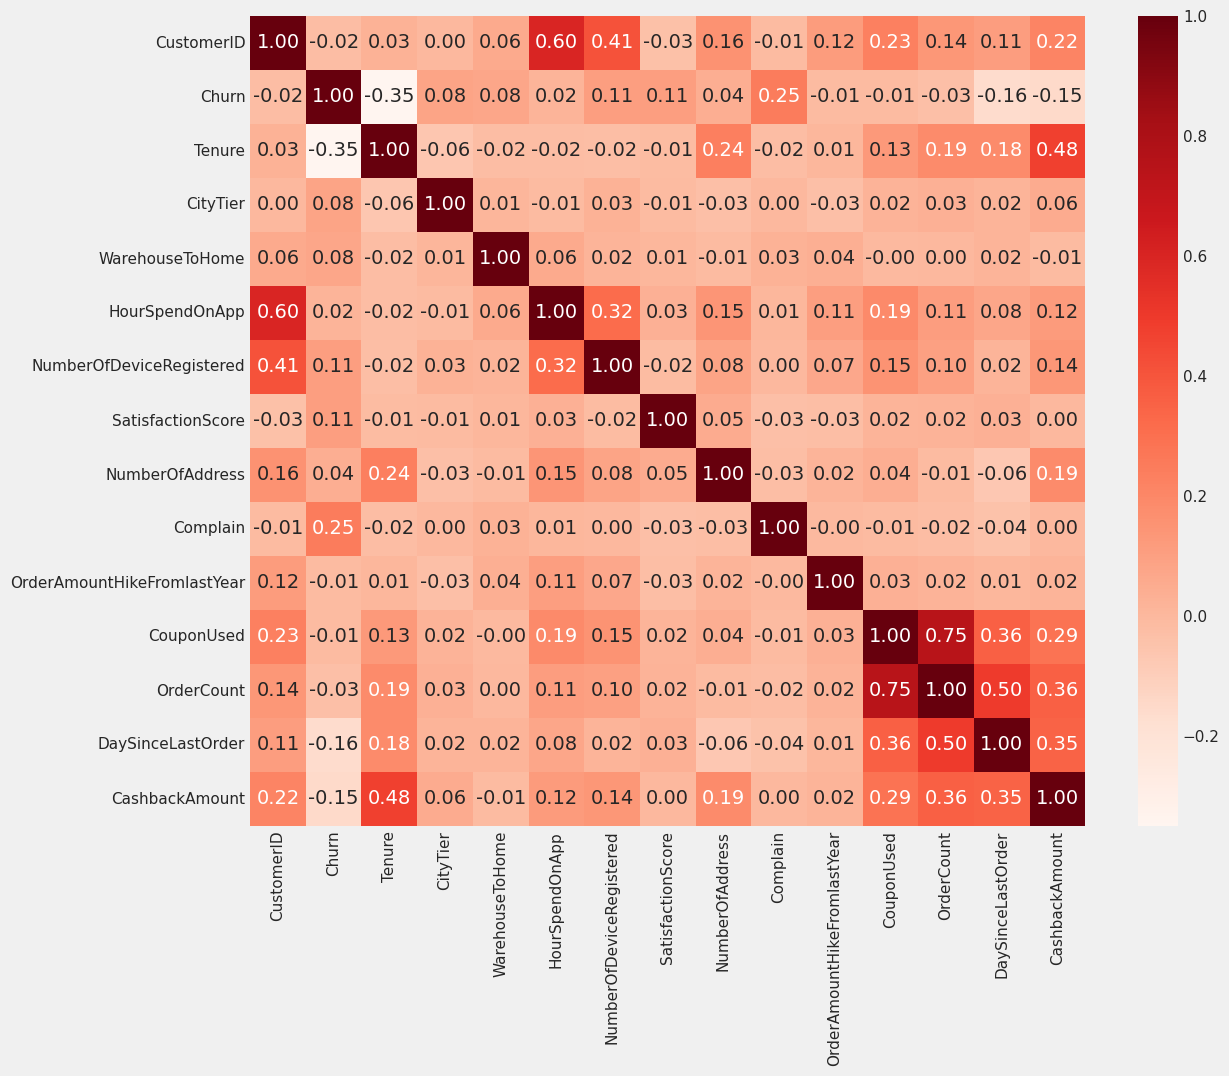

In [ ]:
# Correlation Heatmap (Numeric)
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='Reds', annot=True, fmt='.2f')

Dari Visualisasi Heatmap di atas, terlihat bahwa :
1. Target (Churn) memiliki kolerasi positif dengan `CityTier`, `WarehouseToHome`, `NumberOfDeviceRegistered`, `SatisfactionScore`, `Complain`
2. Target (Churn) memiliki kolerasi negatif `Tenure`,  `DaySinceLastOrder`, dan `CashbackAmount`.
3. Target (Churn) dengan `HourSpendOnApp`,`NumberOfAddress`, `OrderAmoundHikeFromlastYear`, `CouponUsed`, `OrderCount` memiliki kolerasi sangat lemah ~0, ini menandakan bisa jadi fitur tersebut tidak potensial
4. `OrderCount` memiliki kolerasi cukup kuat dengan `CouponUsed`. Hal tersebut bisa dikatakan redundant
5. CustumerID memiliki korelasi yang sangat tinggi namun untuk pemodelan kita tidak akan menggunakannya, karena nilai korelasi yang tinggi kemudian feature yang tidak terlalu penting juga (akan dihapus/di drop pada proses pre-prosessing)

### Korelasi antar Target dan Fitur

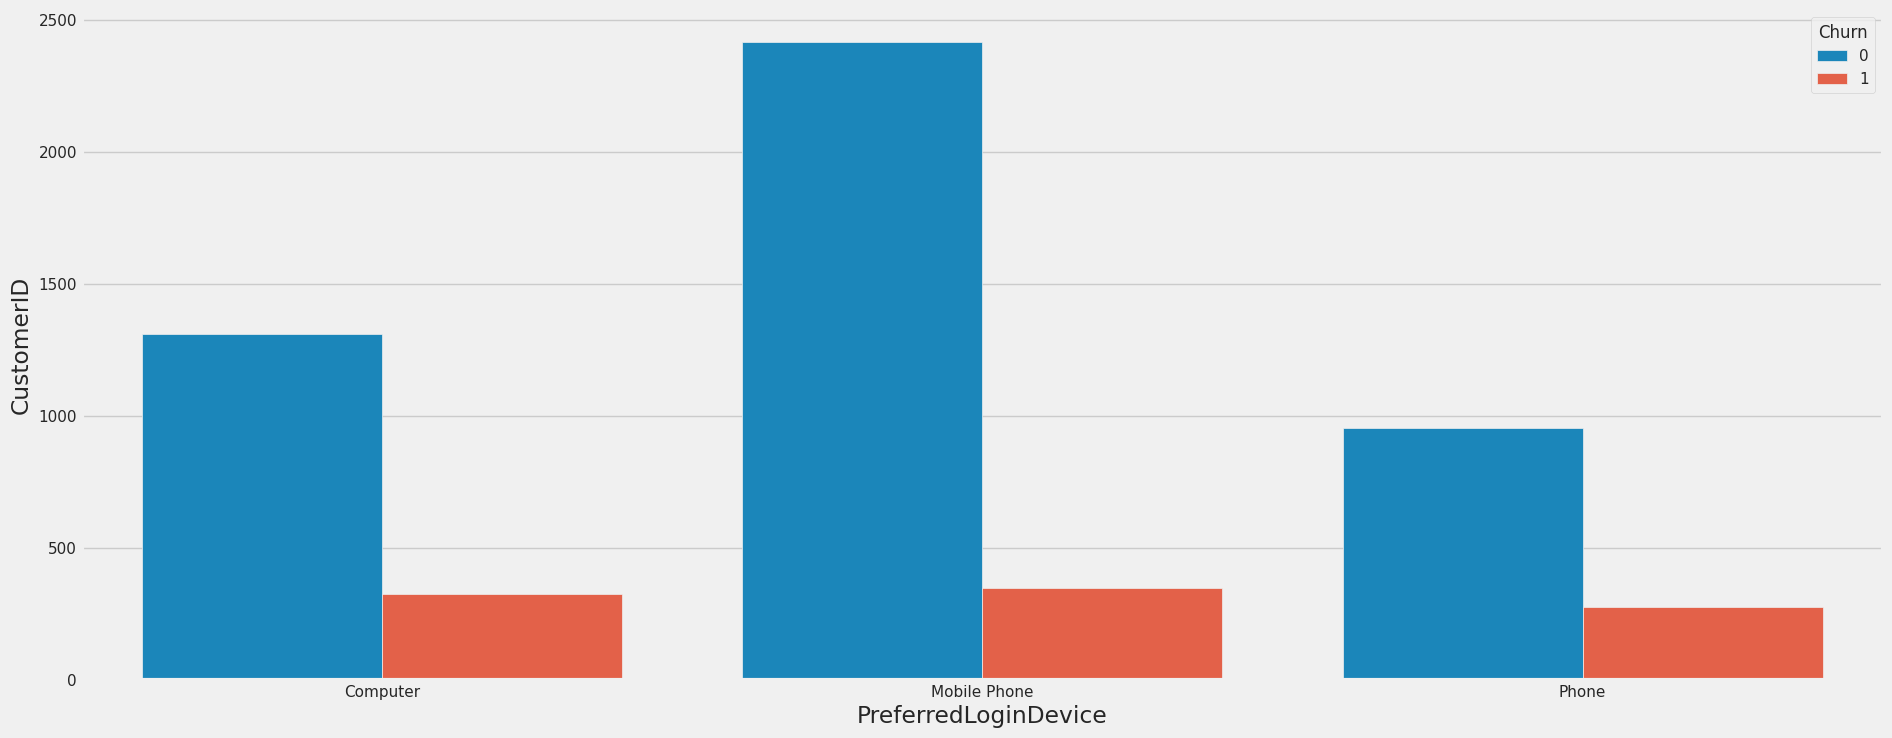

In [ ]:
df9=df.groupby(['PreferredLoginDevice','Churn']).agg({'CustomerID':'nunique'}).reset_index()
sns.barplot(x='PreferredLoginDevice', y ='CustomerID', hue='Churn', data=df9);

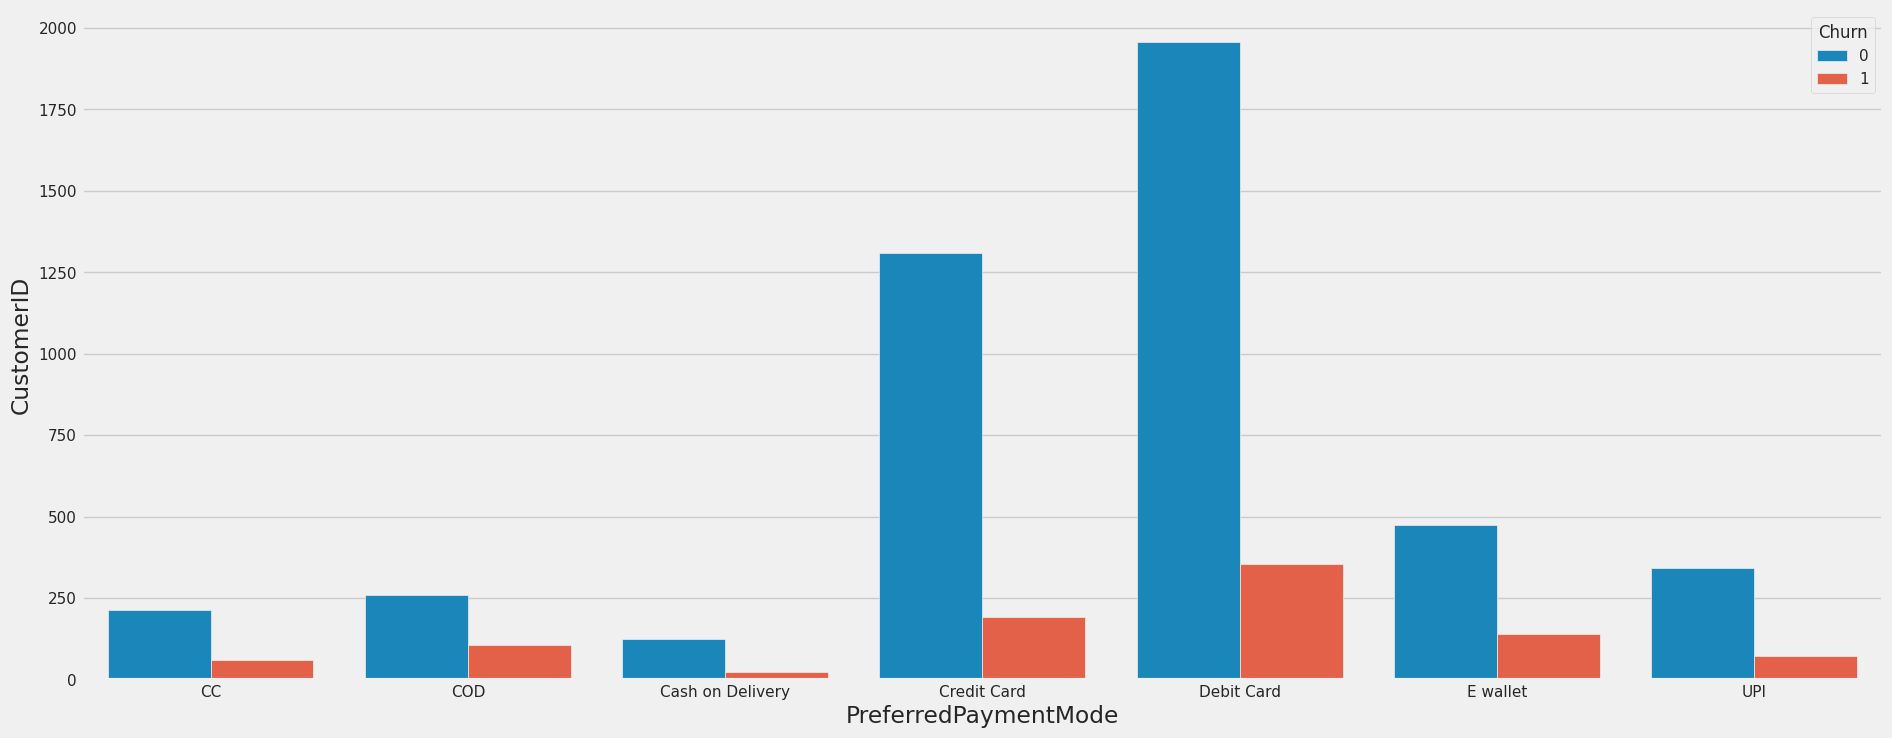

In [ ]:
df10=df.groupby(['PreferredPaymentMode','Churn']).agg({'CustomerID':'nunique'}).reset_index()
sns.barplot(x='PreferredPaymentMode', y ='CustomerID', hue='Churn', data=df10);

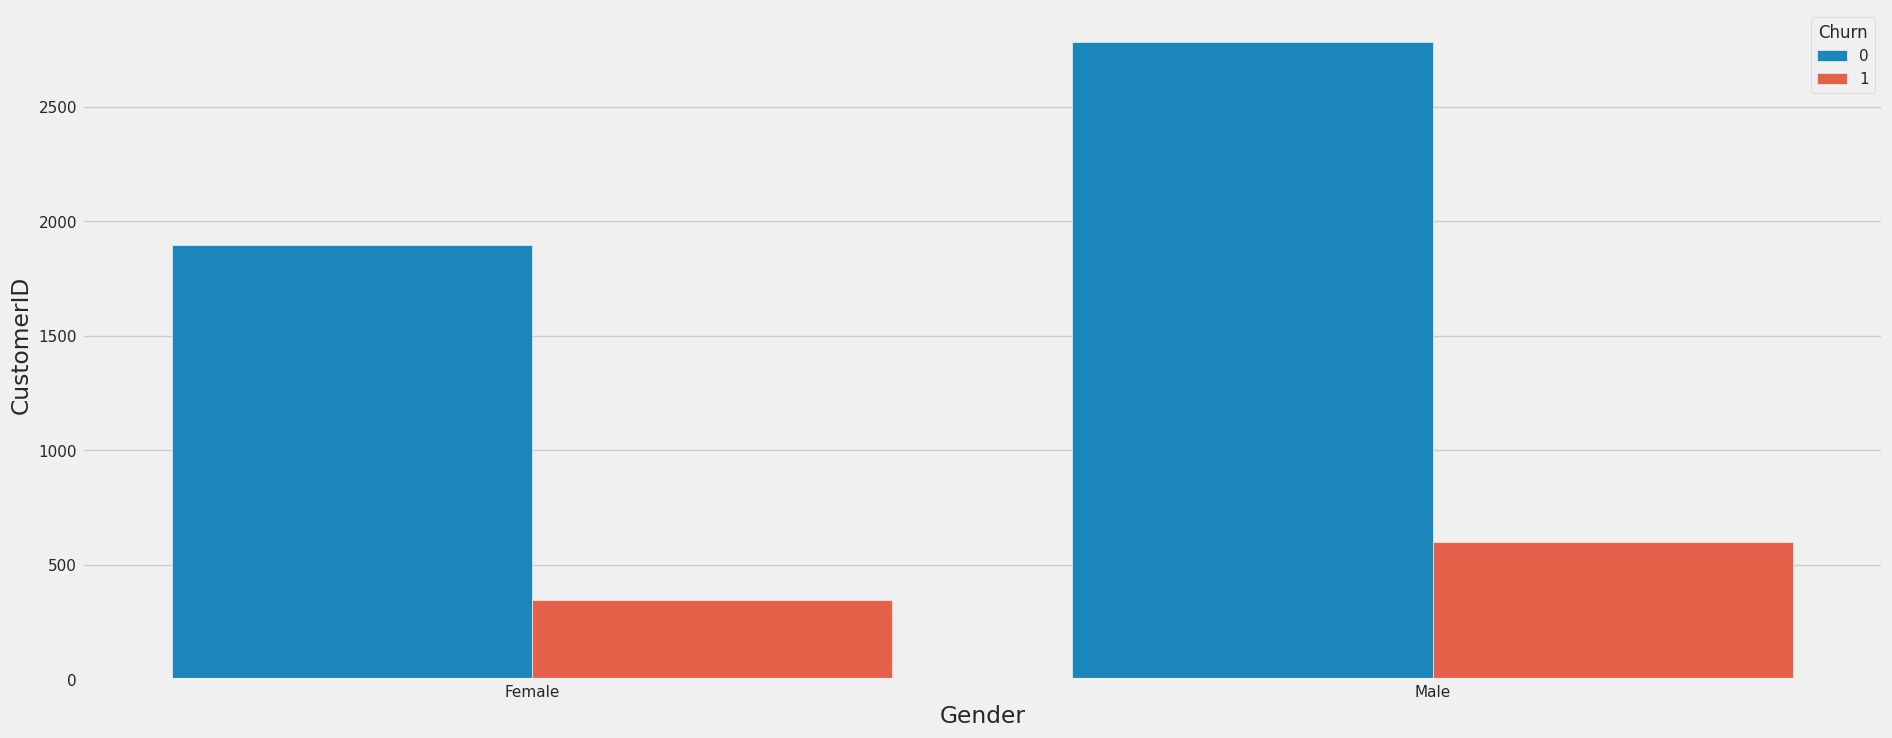

In [ ]:
df11=df.groupby(['Gender','Churn']).agg({'CustomerID':'nunique'}).reset_index()
sns.barplot(x='Gender', y ='CustomerID', hue='Churn', data=df11);

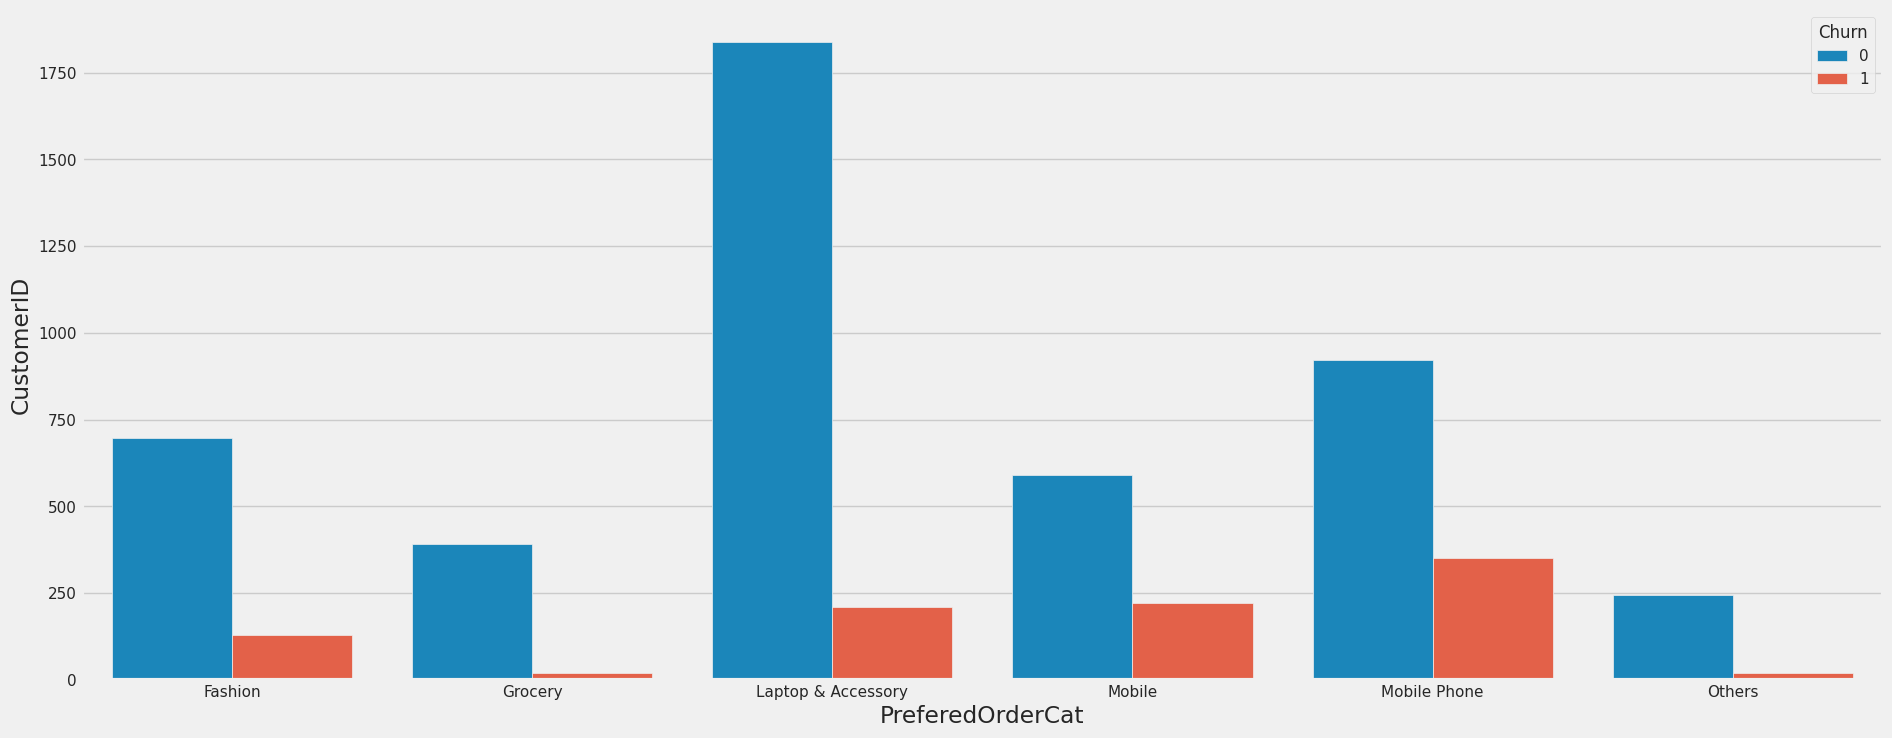

In [ ]:
df12=df.groupby(['PreferedOrderCat','Churn']).agg({'CustomerID':'nunique'}).reset_index()
sns.barplot(x='PreferedOrderCat', y ='CustomerID', hue='Churn', data=df12);

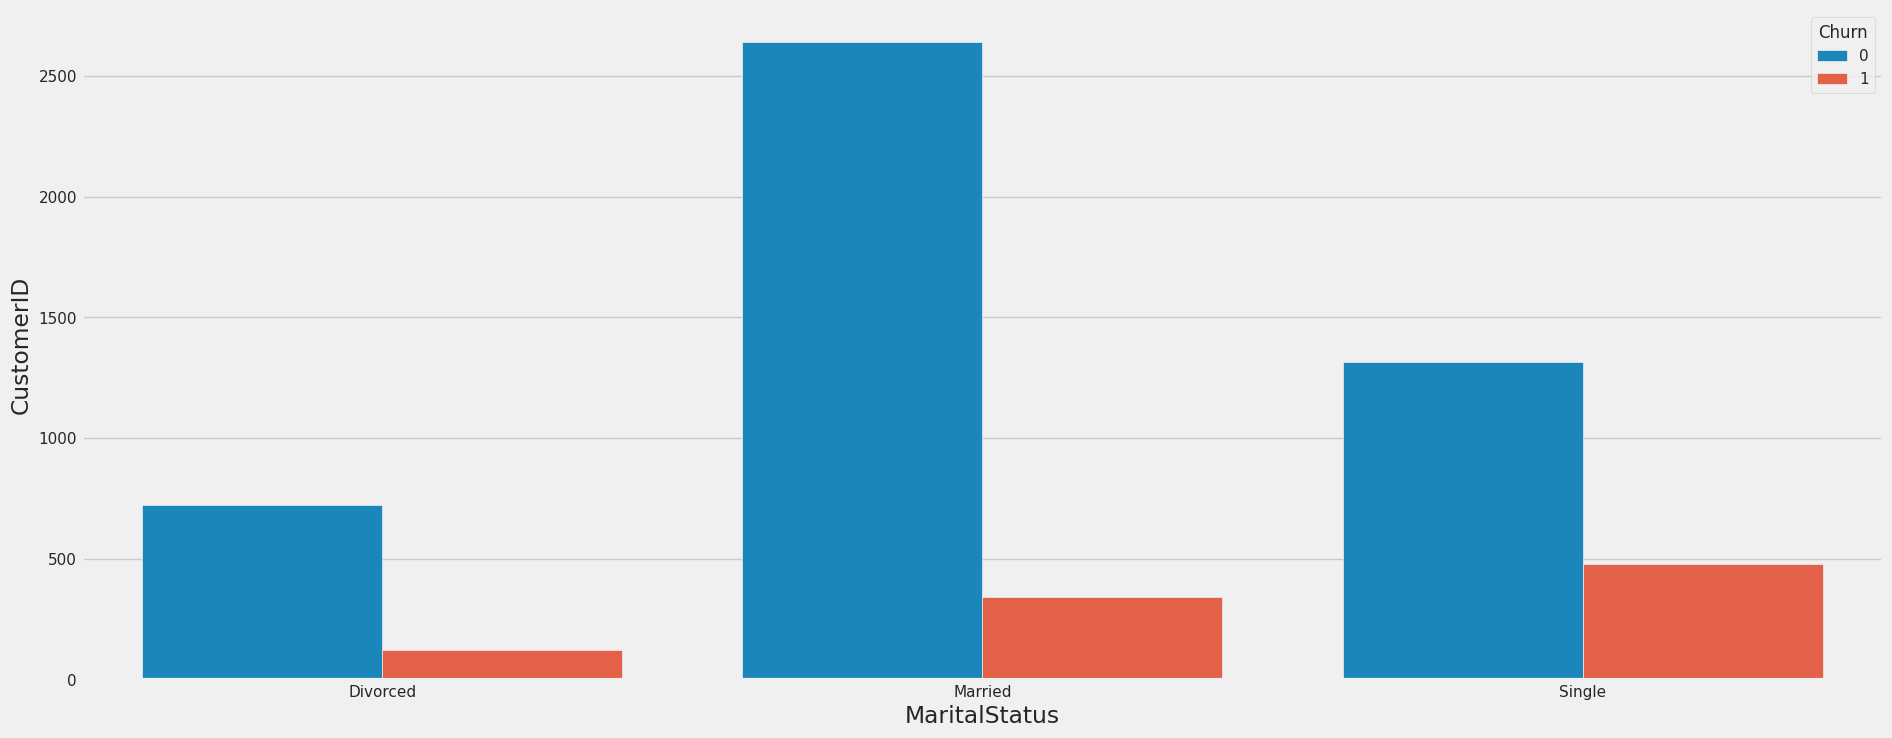

In [ ]:
df13=df.groupby(['MaritalStatus','Churn']).agg({'CustomerID':'nunique'}).reset_index()
sns.barplot(x='MaritalStatus', y ='CustomerID', hue='Churn', data=df13);

Dari visualisasi diatas, terlihat bahwa :
1. Pada Fitur PreferredLoginDevice, Computer dan Mobile Phone memiliki potensi churn paling tinggi.
2. Pada Fitur PreferredPaymentMode, Debit Card memiliki potensi Churn paling tinggi
3. Pada Fitur Gender, Male memiliki potensi churn paling tinggi
4. Pada Fitur PreferredOrderCat, Mobile Phone memiliki potensi churn paling tinggi
5. Pada Fitur MaritalStatus, Single memiliki potensi Churn paling tinggi

## Business Insight

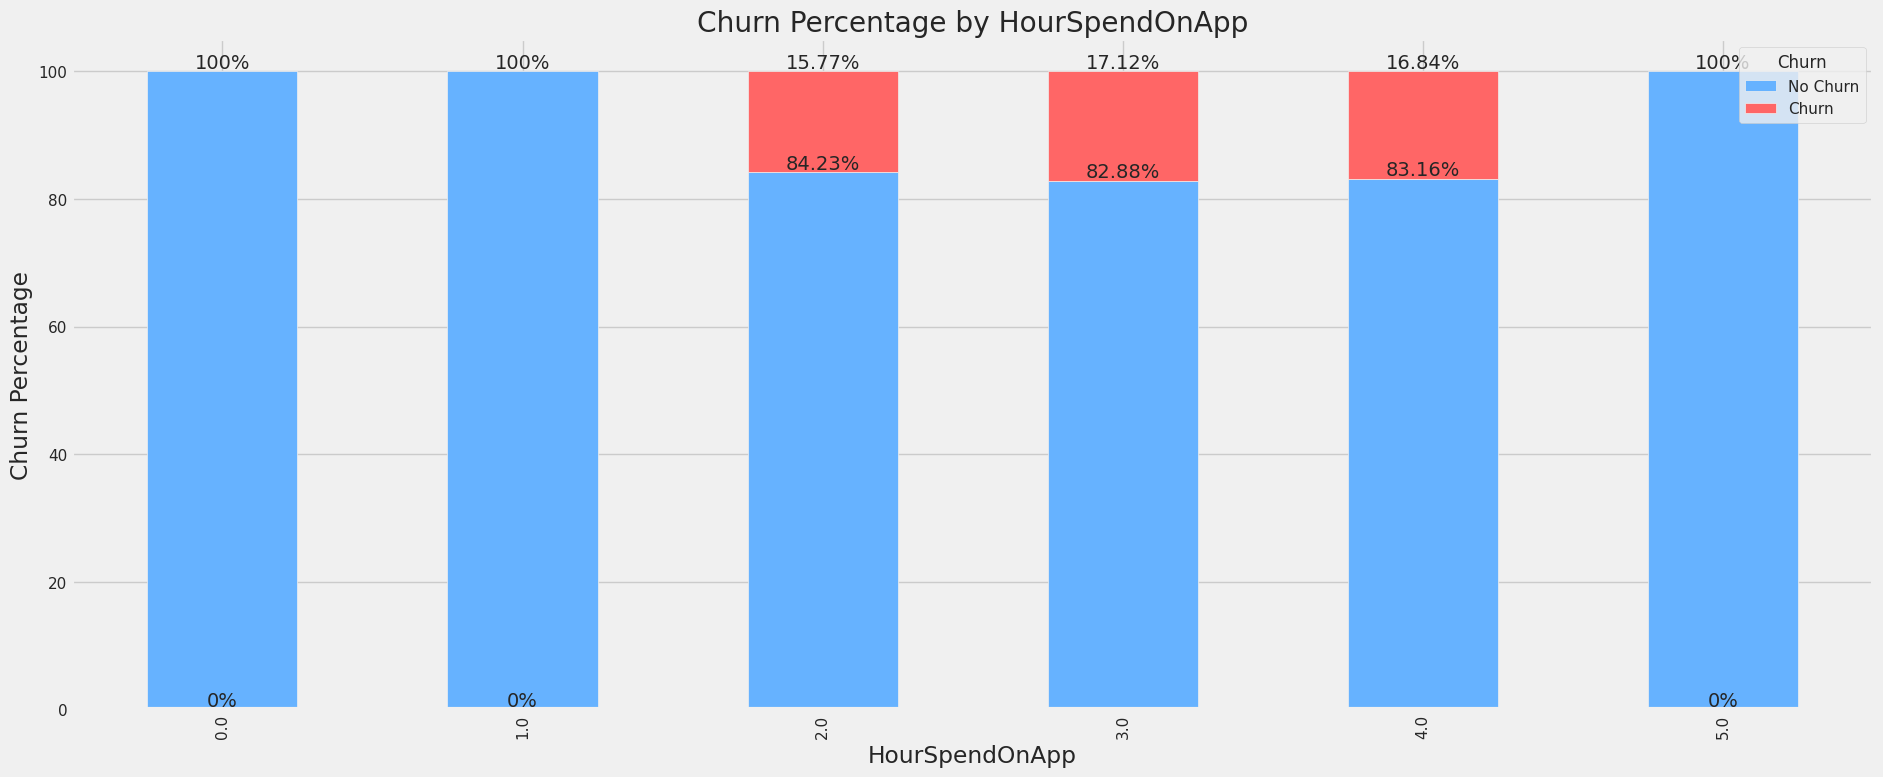

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung tabel kontingensi antara HourSpendOnApp dan Churn
hour_churn_contingency = pd.crosstab(df["HourSpendOnApp"], df["Churn"])

# Menghitung presentase Churn untuk setiap nilai HourSpendOnApp
hour_churn_percentage = (hour_churn_contingency.div(hour_churn_contingency.sum(axis=1), axis=0) * 100).round(2)

# Membuat stacked bar chart dengan warna merah
colors = ['#66B2FF', '#FF6666']
ax = hour_churn_percentage.plot(kind='bar', stacked=True, color=colors, title="Churn Percentage by HourSpendOnApp")
plt.xlabel('HourSpendOnApp')
plt.ylabel('Churn Percentage')
plt.legend(title='Churn', loc='upper right', labels=['No Churn', 'Churn'])

# Menampilkan presentase di atas setiap bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    percentage_label = f'{height}%'

    # Hilangkan 00% jika presentase adalah bilangan bulat
    if height.is_integer():
        percentage_label = f'{int(height)}%'

    ax.annotate(percentage_label, (x + width/2, y + height + 0.5), ha='center')

plt.show()

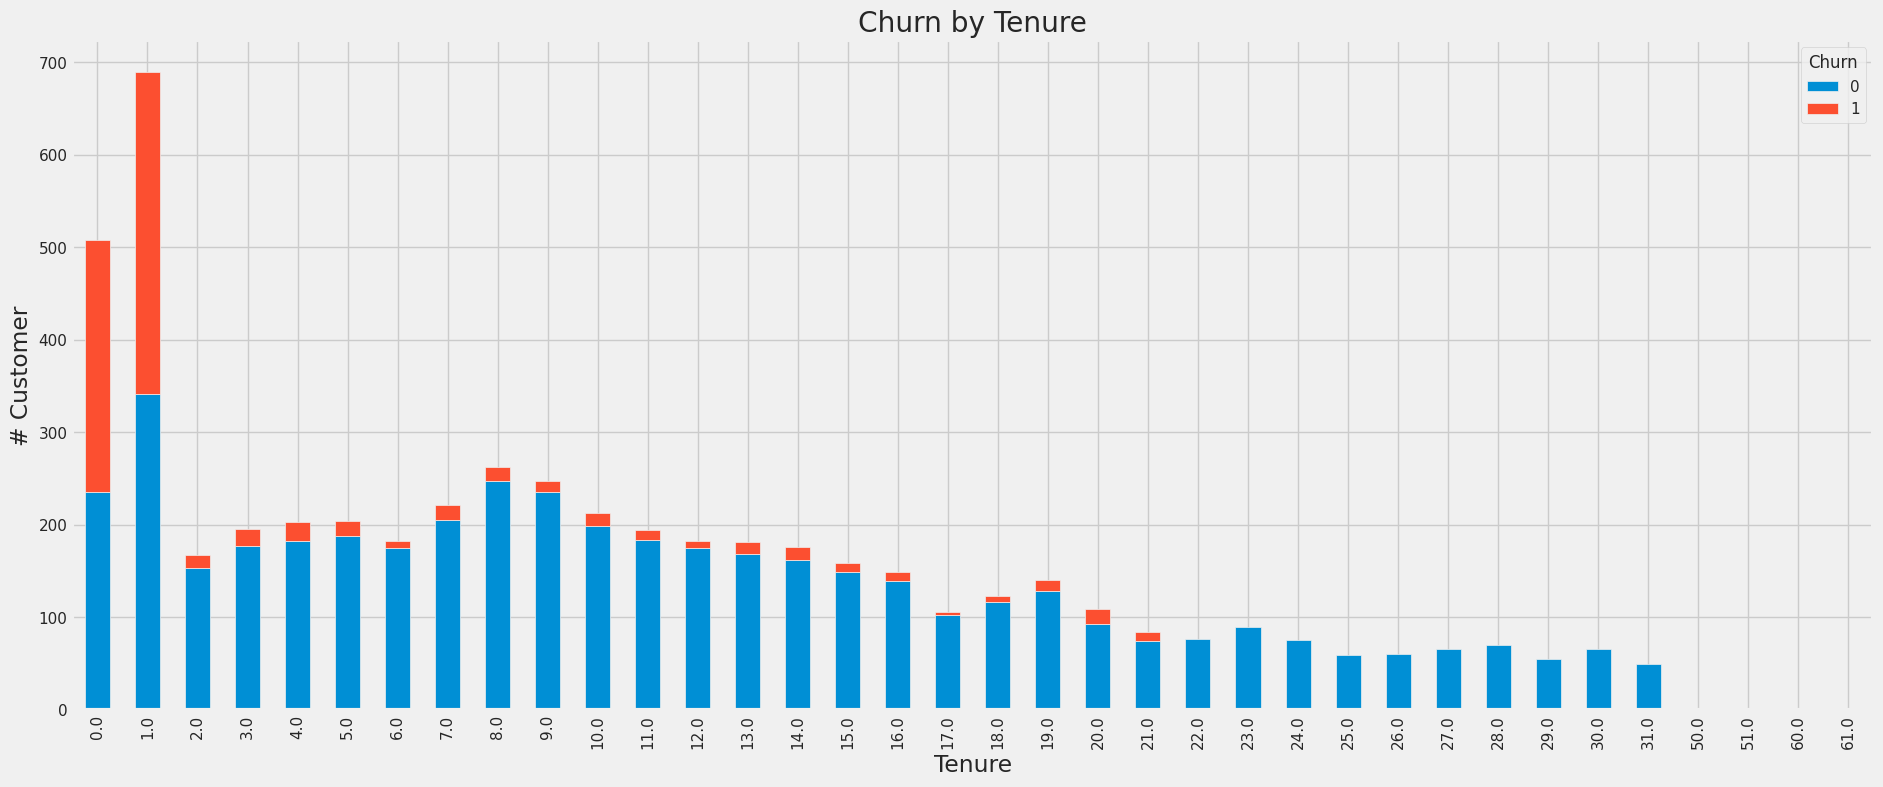

In [ ]:
int_churn_contingency = pd.crosstab(df["Tenure"], df["Churn"])
int_churn_contingency.plot(kind = 'bar', stacked = 'true', title = "Churn by Tenure")
int_churn_contingency
plt.xlabel('Tenure')
plt.ylabel('# Customer')
plt.show()

In [ ]:
int_churn_contingency

Churn,0,1
Tenure,,
0.0,236,272
1.0,341,349
2.0,153,14
3.0,177,18
4.0,183,20
5.0,188,16
6.0,175,8
7.0,205,16
8.0,247,16


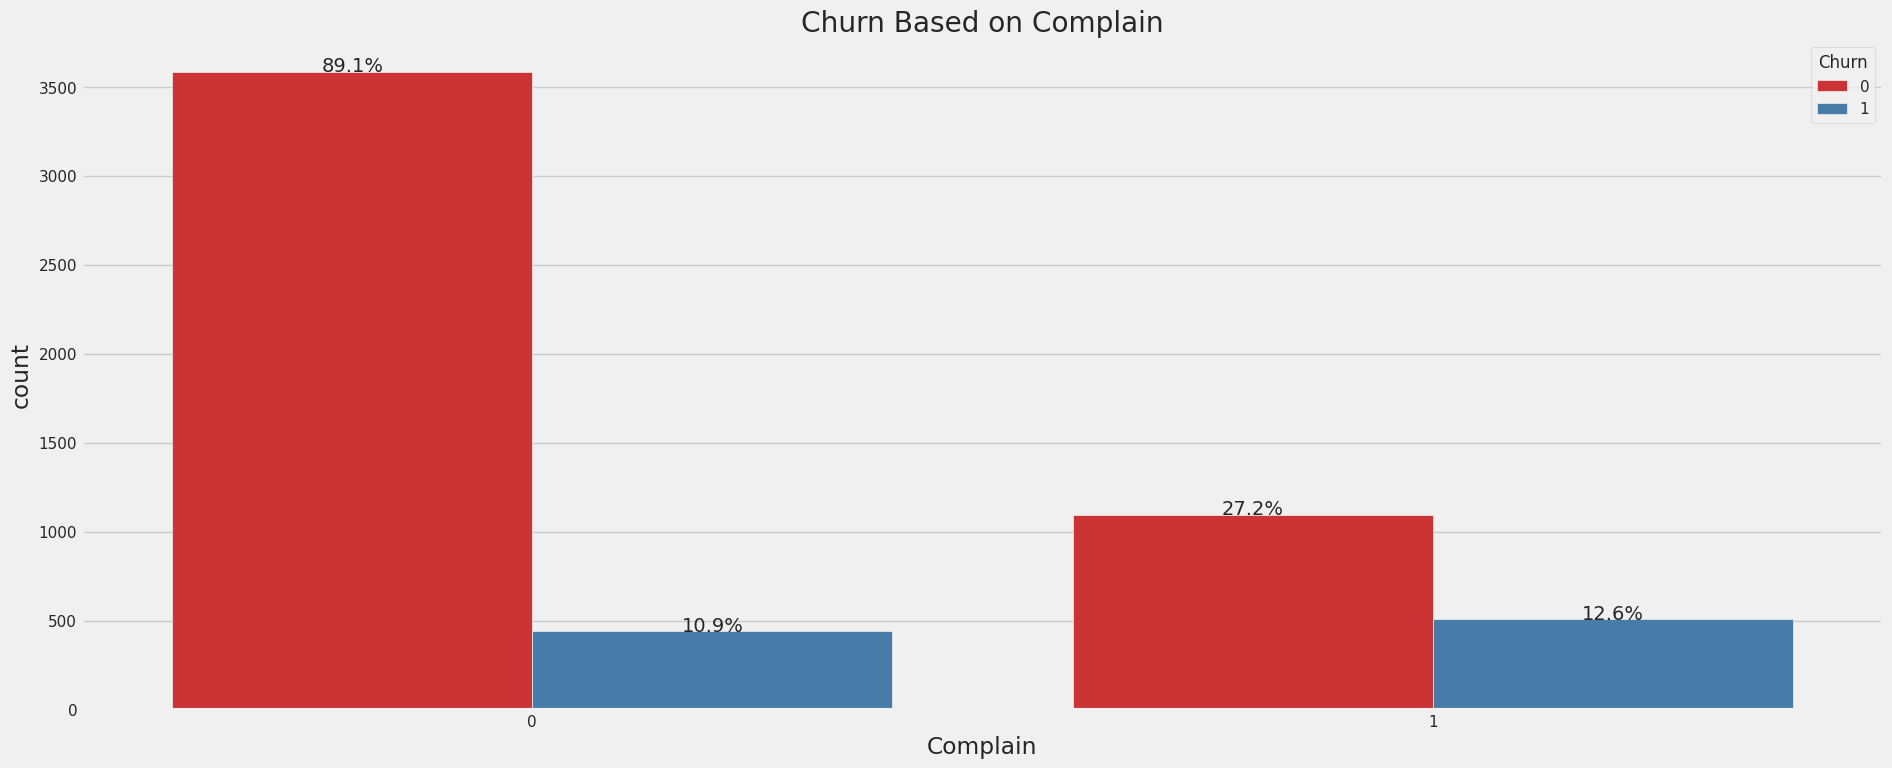

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Using countplot for Churn based on Complain
ax = sns.countplot(x='Complain', data=df, hue='Churn', palette="Set1")

# Adding plot title
plt.title('Churn Based on Complain')

# Calculating percentage for each category
total_per_category = df['Complain'].value_counts()
for p in ax.patches:
    height = p.get_height()
    percentage = height / total_per_category[int(p.get_x())] * 100
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{percentage:.1f}%', ha='center')

# Displaying the plot
plt.show()


### Business Insight 1.

Terdapat kolerasi yang cukup tinggi antara customerID dengan HourSpendOnApp. Namun, antara Churn dengan HourSpendOnApp memiliki kolerasi yang cukup lemah (dibawah 0,05). Hal tersebut menandakan bahwa customer yang membuka App dengan waktu yang lama belum tentu akan menjadi pembeli pada App. Berbanding terbalik dengan Tenure yang memiliki kolerasi yang cukup kuat. Hal tersebut mengartikan bahwa Tim Marketing bisa memfokuskan kepada customer yang sudah lama menggunakan App dalam pemberian promo agar bisa mempertahankan customer lama (bisa dikatakan loyal customer). Karena, customer baru bisa dikatakan sebagai One Time Buyer.

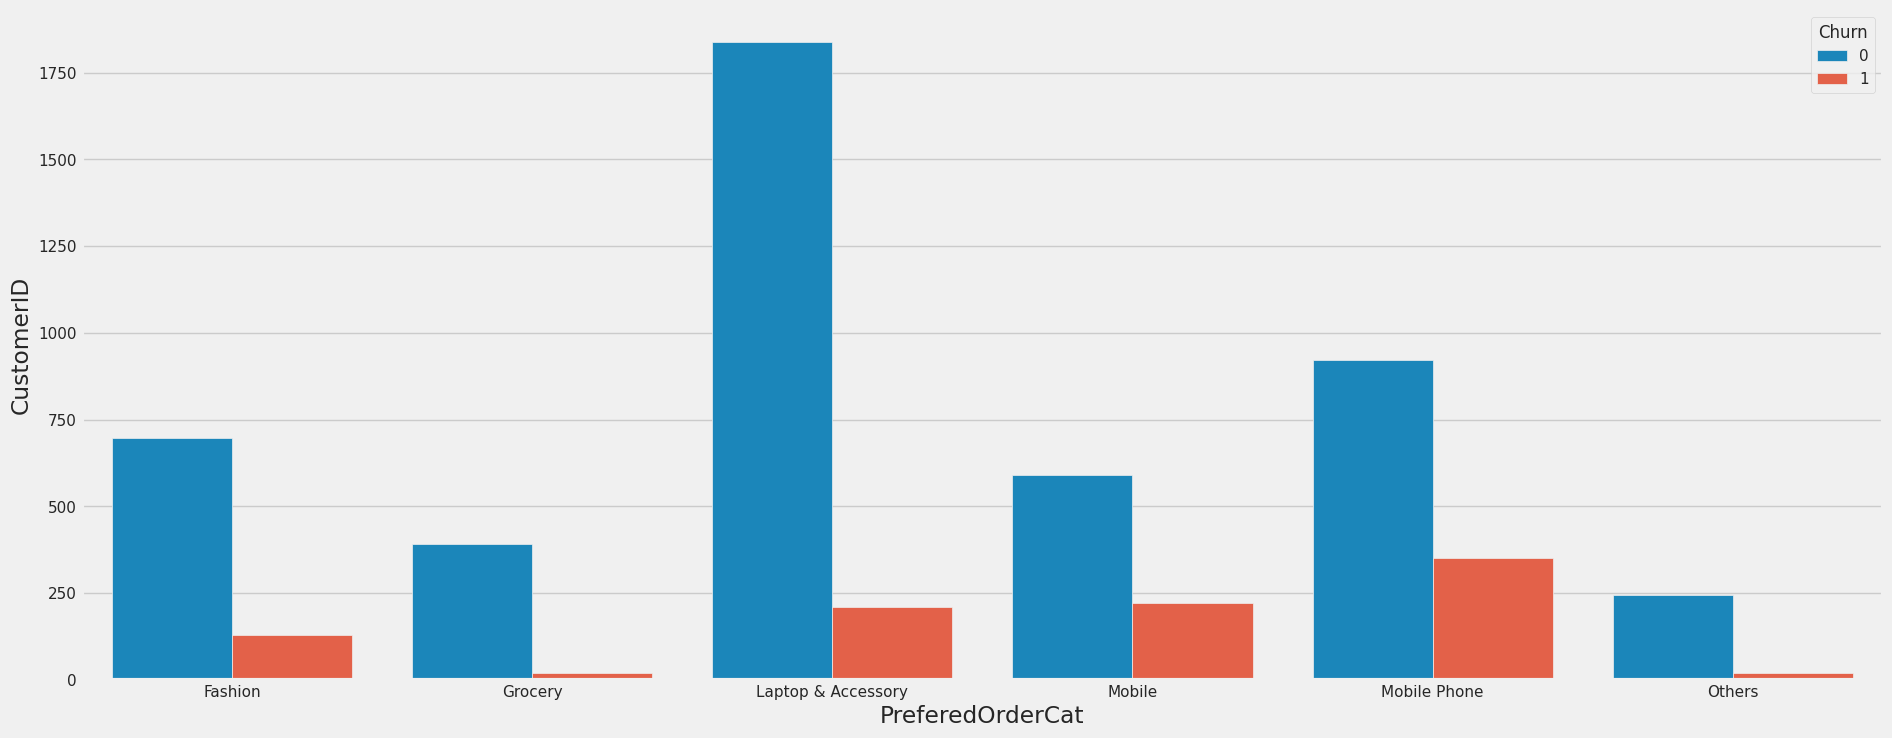

In [ ]:
df12=df.groupby(['PreferedOrderCat','Churn']).agg({'CustomerID':'nunique'}).reset_index()
sns.barplot(x='PreferedOrderCat', y ='CustomerID', hue='Churn', data=df12);

In [ ]:
df12_test = df.groupby(['PreferedOrderCat','Churn']).agg({'CustomerID':'nunique'}).reset_index()
df12_test

,PreferedOrderCat,Churn,CustomerID
0,Fashion,0,698
1,Fashion,1,128
2,Grocery,0,390
3,Grocery,1,20
4,Laptop & Accessory,0,1840
5,Laptop & Accessory,1,210
6,Mobile,0,589
7,Mobile,1,220
8,Mobile Phone,0,921
9,Mobile Phone,1,350


### Business Insight 2.

Dalam pemberian promo, Tim Marketing harus tepat sasaran dengan menyesuaikan dengan behavior (kemampuan belanja) customer. Salah satu contohnya bisa melihat dari PrefferedOrderCat. Misal customer yang memiliki kebiasaan untuk membeli produk Fashion, bisa diberikan promo yang berhubungan dengan produk Fashion. Sedangkan untuk customer yang memiliki kebiasaan untuk membeli produk Laptop & Accessory bisa diberikan promo yang berhubungan dengan produk Laptop & Accessory. Hal tersebut dapat mengurangi kemungkinan untuk Churn

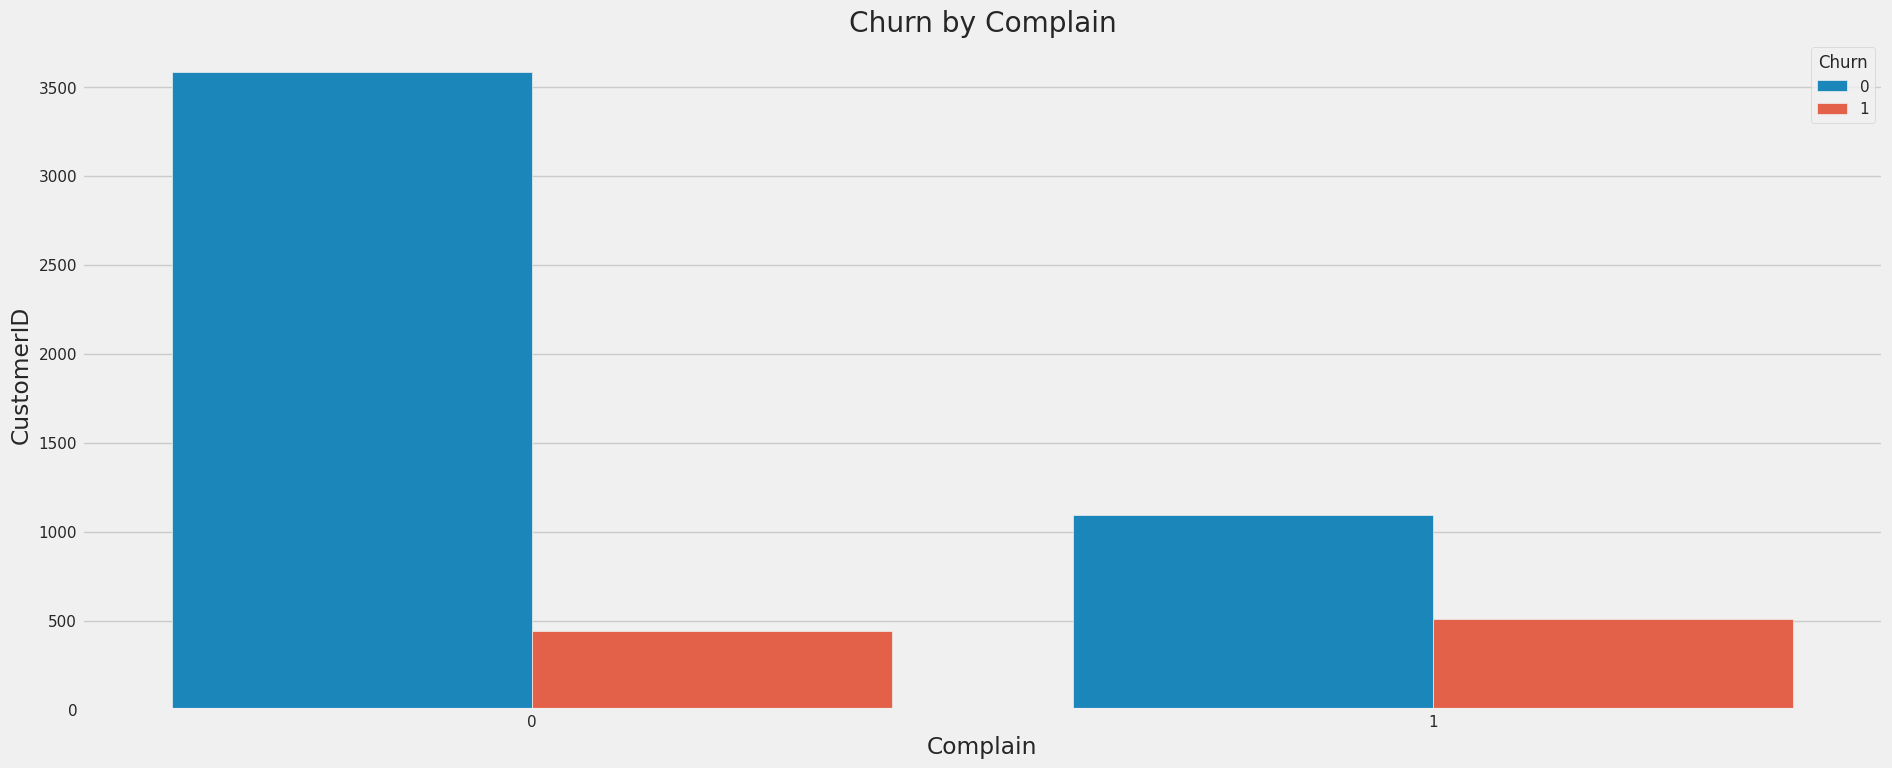

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df14_test is your DataFrame
sns.barplot(x='Complain', y='CustomerID', hue='Churn', data=df14_test)
plt.title('Churn by Complain')
plt.xlabel('Complain')
plt.ylabel('CustomerID')
plt.show()

In [ ]:
df14_test = df.groupby(['Complain','Churn']).agg({'CustomerID':'nunique'}).reset_index()
df14_test

,Complain,Churn,CustomerID
0,0,0,3586
1,0,1,440
2,1,0,1096
3,1,1,508


### Business Insight 3.
Melihat dari correlation heatmap, tingkat complain masih cenderung tinggi. oleh karena itu team customer Service harus memantau komplain pelanggan secara berkala agar segera menindak lanjuti saat terjadi jika keluhan pelanggan di tangani secara, kemungkinan besar customer akan tetap loyal kepada aplikasi Bukanbapak. Selain itu komplain pelanggan juga dapat menjadi peluang untuk meningkatkan produk dan layanan dan dapat meningkatkan SatisfactionRate.